In [1]:
import torch 
import numpy as np
from envs import env

In [2]:
sandbox = env.Env(grid_size=(100,100))

In [3]:
def glider():
    return np.array([[0, 0, 1],
                     [1, 0, 1],
                     [0, 1, 1]])

def gosper_glider_gun():
    gun = np.zeros(11 * 38).reshape(11, 38)
    gun[5][1] = gun[5][2] = 1
    gun[6][1] = gun[6][2] = 1

    gun[3][13] = gun[3][14] = 1
    gun[4][12] = gun[4][16] = 1
    gun[5][11] = gun[5][17] = 1
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 1
    gun[7][11] = gun[7][17] = 1
    gun[8][12] = gun[8][16] = 1
    gun[9][13] = gun[9][14] = 1

    gun[1][25] = 1
    gun[2][23] = gun[2][25] = 1
    gun[3][21] = gun[3][22] = 1
    gun[4][21] = gun[4][22] = 1
    gun[5][21] = gun[5][22] = 1
    gun[6][23] = gun[6][25] = 1
    gun[7][25] = 1

    gun[3][35] = gun[3][36] = 1
    gun[4][35] = gun[4][36] = 1
    
    return gun

In [4]:
patterns = {"glider": glider(),
            "gosper_glider_gun": gosper_glider_gun()}

In [5]:
agents_perception_field = torch.tensor(((0,0,1),(1,0,1), (0,1,1)))
agents_field_position_x = 0
agents_field_position_y = 0

In [6]:
env_state = sandbox.step(perception_field=agents_perception_field, 
                         field_position_x=agents_field_position_x, 
                         field_position_y=agents_field_position_y)

In [10]:
# sandbox.insert_block_into_grid(patterns['glider'], 0,0)
sandbox.insert_block_into_grid(patterns['gosper_glider_gun'], 0,0)

In [11]:
sandbox.grid_update()
sandbox.grid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

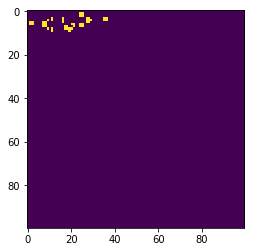

In [21]:
sandbox.grid_update()
plt.imshow(sandbox.grid)